In [1]:
import pandas as pd

nsp7 = "SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATLQ"
nsp8 = "AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAKSEFDRDAAMQRKLEKMADQAMTQMYKQARSEDKRAKVTSAMQTMLFTMLRKLDNDALNNIINNARDGCVPLNIIPLTTAAKLMVVIPDYNTYKNTCDGTTFTYASALWEIQQVVDADSKIVQLSEISMDNSPNLAWPLIVTALRANSAVKLQ"

df_1_m = pd.read_csv("202001216_nsp7nsp8_1to1_trypsin_XL_REP1_uniq_gbSeqPos.tsv", sep = "\t")
df_2_m = pd.read_csv("202001216_nsp7nsp8_1to1_trypsin_XL_REP2_uniq_gbSeqPos.tsv", sep = "\t")
df_3_m = pd.read_csv("202001216_nsp7nsp8_1to1_trypsin_XL_REP3_uniq_gbSeqPos.tsv", sep = "\t")
df_4_m = pd.read_csv("202001216_nsp7nsp8_1to2_trypsin_XL_REP1_uniq_gbSeqPos.tsv", sep = "\t")
df_5_m = pd.read_csv("202001216_nsp7nsp8_1to2_trypsin_XL_REP2_uniq_gbSeqPos.tsv", sep = "\t")
df_6_m = pd.read_csv("202001216_nsp7nsp8_1to2_trypsin_XL_REP3_uniq_gbSeqPos.tsv", sep = "\t")
df_7_m = pd.read_csv("202001216_nsp8_trypsin_XL_REP1_uniq_gbSeqPos.tsv", sep = "\t")
df_8_m = pd.read_csv("202001216_nsp8_trypsin_XL_REP2_uniq_gbSeqPos.tsv", sep = "\t")
df_9_m = pd.read_csv("202001216_nsp8_trypsin_XL_REP3_uniq_gbSeqPos.tsv", sep = "\t")

df_1_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP1.xlsx")
df_2_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP2.xlsx")
df_3_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP3.xlsx")
df_4_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP1.xlsx")
df_5_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP2.xlsx")
df_6_a = pd.read_excel("annika_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP3.xlsx")
df_7_a = pd.read_excel("annika_results/202001216_nsp8_trypsin_XL_REP1.xlsx")
df_8_a = pd.read_excel("annika_results/202001216_nsp8_trypsin_XL_REP2.xlsx")
df_9_a = pd.read_excel("annika_results/202001216_nsp8_trypsin_XL_REP3.xlsx")

df_1_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP1.xlsx")
df_2_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP2.xlsx")
df_3_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to1_trypsin_XL_REP3.xlsx")
df_4_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP1.xlsx")
df_5_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP2.xlsx")
df_6_x = pd.read_excel("xlinkx_results/202001216_nsp7nsp8_1to2_trypsin_XL_REP3.xlsx")
df_7_x = pd.read_excel("xlinkx_results/202001216_nsp8_trypsin_XL_REP1-(1).xlsx")
df_8_x = pd.read_excel("xlinkx_results/202001216_nsp8_trypsin_XL_REP2-(2).xlsx")
df_9_x = pd.read_excel("xlinkx_results/202001216_nsp8_trypsin_XL_REP3.xlsx")

def clean_sequence(sequence):
    return sequence.replace("[", "").replace("]", "").upper()

print("Test: ", clean_sequence("adb[cd]ef"))

def xlinkx_get_tp_fp_nsp7nsp8(row):
    if (clean_sequence(row["Sequence A"]) in nsp7 or clean_sequence(row["Sequence A"]) in nsp8) and (clean_sequence(row["Sequence B"]) in nsp7 or clean_sequence(row["Sequence B"]) in nsp8):
        return "tp"
    else:
        return "fp"
      
def xlinkx_get_tp_fp_nsp8(row):
    if clean_sequence(row["Sequence A"]) in nsp8 and clean_sequence(row["Sequence B"]) in nsp8:
        return "tp"
    else:
        return "fp"
      
def xlinkx_get_cutoff_for_fdr_nsp7nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: xlinkx_get_tp_fp_nsp7nsp8(row), axis = 1)
    scores = input_df["Max. XlinkX Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Max. XlinkX Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Max. XlinkX Score"] > f_score].shape[0]]

def xlinkx_get_cutoff_for_fdr_nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: xlinkx_get_tp_fp_nsp8(row), axis = 1)
    scores = input_df["Max. XlinkX Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Max. XlinkX Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Max. XlinkX Score"] > f_score].shape[0]]
      
def maxlinker_get_tp_fp_nsp7nsp8(row):
    if ("nsp7" in row["Protein_a description"].lower() or "nsp8" in row["Protein_a description"].lower()) and ("nsp7" in row["Protein_b description"].lower() or "nsp8" in row["Protein_b description"].lower()):
        return "tp"
    else:
        return "fp"
    
def maxlinker_get_tp_fp_nsp8(row):
    if "nsp8" in row["Protein_a description"].lower() and "nsp8" in row["Protein_b description"].lower():
        return "tp"
    else:
        return "fp"

def maxlinker_get_cutoff_for_fdr_nsp7nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: maxlinker_get_tp_fp_nsp7nsp8(row), axis = 1)
    scores = input_df["Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Score"] > f_score].shape[0]]

def maxlinker_get_cutoff_for_fdr_nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: maxlinker_get_tp_fp_nsp8(row), axis = 1)
    scores = input_df["Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Score"] > f_score].shape[0]]

def annika_get_tp_fp_nsp7nsp8(row):
    if ("nsp7" in row["Protein Descriptions A"].lower() or "nsp8" in row["Protein Descriptions A"].lower()) and ("nsp7" in row["Protein Descriptions B"].lower() or "nsp8" in row["Protein Descriptions B"].lower()):
        return "tp"
    else:
        return "fp"
    
def annika_get_tp_fp_nsp8(row):
    if "nsp8" in row["Protein Descriptions A"].lower() and "nsp8" in row["Protein Descriptions B"].lower():
        return "tp"
    else:
        return "fp"

def annika_get_cutoff_for_fdr_nsp7nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: annika_get_tp_fp_nsp7nsp8(row), axis = 1)
    scores = input_df["Best CSM Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Best CSM Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Best CSM Score"] > f_score].shape[0]]

def annika_get_cutoff_for_fdr_nsp8(input_df, fdr = 0.01):
    input_df["TP/FP"] = input_df.apply(lambda row: annika_get_tp_fp_nsp8(row), axis = 1)
    scores = input_df["Best CSM Score"].to_list()
    f_score = 0
    for score in sorted(scores):
        df = input_df[input_df["Best CSM Score"] > score]
        if df[df["TP/FP"] == "fp"].shape[0] / df.shape[0] < fdr:
            f_score = score
            break
    return [input_df.shape[0], input_df[input_df["TP/FP"] == "fp"].shape[0], f_score, input_df[input_df["Best CSM Score"] > f_score].shape[0]]

print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_1_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_1_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_1_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_2_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_2_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_2_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_3_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_3_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_3_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_4_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_4_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_4_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_5_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_5_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_5_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp7nsp8(df_6_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp7nsp8(df_6_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp7nsp8(df_6_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp8(df_7_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp8(df_7_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp8(df_7_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp8(df_8_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp8(df_8_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp8(df_8_x))
print("Annika: ", annika_get_cutoff_for_fdr_nsp8(df_9_a), "; MaXLinker: ", maxlinker_get_cutoff_for_fdr_nsp8(df_9_m), "; XlinkX: ", xlinkx_get_cutoff_for_fdr_nsp8(df_9_x))

Test:  ADBCDEF
Annika:  [13, 0, 24.14, 12] ; MaXLinker:  [9, 0, 29.81, 8] ; XlinkX:  [16, 2, 30.58, 9]
Annika:  [14, 0, 38.73, 13] ; MaXLinker:  [12, 0, 29.78, 11] ; XlinkX:  [18, 1, 92.3, 7]
Annika:  [14, 0, 52.89, 13] ; MaXLinker:  [9, 0, 39.93, 8] ; XlinkX:  [18, 0, 10.87, 17]
Annika:  [29, 4, 25.86, 25] ; MaXLinker:  [14, 1, 59.85, 12] ; XlinkX:  [26, 4, 84.36, 9]
Annika:  [10, 0, 102.74, 9] ; MaXLinker:  [16, 1, 39.47, 15] ; XlinkX:  [26, 2, 145.31, 4]
Annika:  [27, 2, 64.72, 17] ; MaXLinker:  [14, 1, 59.92, 13] ; XlinkX:  [23, 3, 121.77, 7]
Annika:  [10, 0, 62.33, 9] ; MaXLinker:  [9, 1, 59.83, 7] ; XlinkX:  [16, 2, 96.67, 7]
Annika:  [19, 2, 35.87, 15] ; MaXLinker:  [11, 1, 59.9, 10] ; XlinkX:  [17, 2, 7.32, 15]
Annika:  [14, 0, 45.56, 13] ; MaXLinker:  [10, 0, 59.9, 9] ; XlinkX:  [14, 1, 5.85, 13]


| Sample | Annika | MaXLinker | XlinkX |
| -------|--------|-----------|--------|
| 1to1-1 | 13 | 9 | 14 | 
| 1to1-2 | 14 | 12 | 17 | 
| 1to1-3 | 14 | 9 | 18 | 
| 1to2-1 | 25 | 13 | 22 | 
| 1to2-2 | 10 | 15 | 24 | 
| 1tp2-3 | 25 | 13 | 20 | 
| nsp8-1 | 10 | 8 | 14 | 
| nsp8-2 | 17 | 10 | 15 | 
| nsp8-3 | 14 | 10 | 13 | 

In [2]:
annika_links_1to1 = set()

for i, row in df_1_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to1:
            annika_links_1to1.add(crosslink)
            
for i, row in df_2_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to1:
            annika_links_1to1.add(crosslink)
            
for i, row in df_3_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to1:
            annika_links_1to1.add(crosslink)
            
print(len(annika_links_1to1))
annika_links_1to1

21


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-MADQAMTQMYKQAR11',
 'ANSAVKLQ6-VESSSKLWAQCVQLHNDILLAK6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-SEDKR4',
 'KLDNDALNNIINNAR1-SKMSDVK1',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KSLNVAK1-SEDKR4',
 'LWAQCVQLHNDILLAKDTTEAFEK16-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SKMSDVK1',
 'SEDKR4-SLNVAKSEFDRDAAMQR6',
 'SEDKR4-VESSSKLWAQCVQLHNDILLAK6'}

In [3]:
annika_links_1to2 = set()

for i, row in df_4_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to2:
            annika_links_1to2.add(crosslink)
            
for i, row in df_5_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to2:
            annika_links_1to2.add(crosslink)
            
for i, row in df_6_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_1to2:
            annika_links_1to2.add(crosslink)
            
print(len(annika_links_1to2))
annika_links_1to2

29


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-KSLNVAK1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-LWAQCVQLHNDILLAKDTTEAFEK16',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'ANSAVKLQ6-VESSSKLWAQCVQLHNDILLAK6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KSLNVAK1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-MSDVKCTSVVLLSVLQQLR5',
 'KLDNDALNNIINNAR1-SEDKR4',
 'KLDNDALNNIINNAR1-SKMSDVK1',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KLEKMADQAMTQMYK4-SEDKR4',
 'KSLNVAK1-SEDKR4',
 'LWAQCVQLHNDILLAKDTTEAFEK16-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'MVSLLSVLLSMQGAVDINKLCEEMLDNR19-SEDKR4',
 'SEDKR4-SKMSDVK1',
 'SEDKR4-SKMSDVK2',
 'SEDKR4-SLNVAKSEFDRDAAMQR6',
 'SEDKR4-VESSSKLWAQCVQLHNDILLAK6'

In [4]:
annika_links_nsp8 = set()

for i, row in df_7_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_nsp8:
            annika_links_nsp8.add(crosslink)
            
for i, row in df_8_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_nsp8:
            annika_links_nsp8.add(crosslink)
            
for i, row in df_9_a.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(row["Position A"]), str(clean_sequence(row["Sequence B"])) + str(row["Position B"])]))
        if crosslink not in annika_links_nsp8:
            annika_links_nsp8.add(crosslink)
            
print(len(annika_links_nsp8))
annika_links_nsp8

22


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK4',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KLEKMADQAMTQMYK4',
 'KLDNDALNNIINNAR1-KSLNVAK1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-SEDKR4',
 'KLDNDALNNIINNAR1-SLNVAKSEFDRDAAMQR6',
 'KLEKMADQAMTQMYK1-SEDKR4',
 'KLEKMADQAMTQMYK4-SEDKR4',
 'KSLNVAK1-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SLNVAKSEFDRDAAMQR6'}

In [5]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "[":
            return i
        else:
            i += 1
            
xlinkx_links_1to1 = set()

for i, row in df_1_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to1:
            xlinkx_links_1to1.add(crosslink)

for i, row in df_2_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to1:
            xlinkx_links_1to1.add(crosslink)
            
for i, row in df_3_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to1:
            xlinkx_links_1to1.add(crosslink)

            
print(len(xlinkx_links_1to1))
xlinkx_links_1to1

22


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-LMVVIPDYNTYKNTCDGTTFTYASALWEIQQVVDADSK12',
 'ANSAVKLQ6-LWAQCVQLHNDILLAKDTTEAFEK16',
 'ANSAVKLQ6-SEDKR4',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'ANSAVKLQ6-VESSSKLWAQCVQLHNDILLAK6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-SEDKR4',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KLDNDALNNIINNAR1-SKMSDVKNone',
 'KLDNDALNNIINNAR1-SLNVAKSEFDRDAAMQR6',
 'KSLNVAK1-SEDKR4',
 'LWAQCVQLHNDILLAKDTTEAFEK16-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-VESSSKLWAQCVQLHNDILLAK6'}

In [6]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "[":
            return i
        else:
            i += 1
            
xlinkx_links_1to2 = set()

for i, row in df_4_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to2:
            xlinkx_links_1to2.add(crosslink)

for i, row in df_5_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to2:
            xlinkx_links_1to2.add(crosslink)
            
for i, row in df_6_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_1to2:
            xlinkx_links_1to2.add(crosslink)

            
print(len(xlinkx_links_1to2))
xlinkx_links_1to2

29


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK1',
 'ANSAVKLQ6-LMVVIPDYNTYKNTCDGTTFTYASALWEIQQVVDADSK12',
 'ANSAVKLQ6-LWAQCVQLHNDILLAKDTTEAFEK16',
 'ANSAVKLQ6-SEDKR4',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'ANSAVKLQ6-VESSSKLWAQCVQLHNDILLAK6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLEKMADQAMTQMYK1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-MSDVKCTSVVLLSVLQQLR5',
 'KLDNDALNNIINNAR1-MVSLLSVLLSMQGAVDINKLCEEMLDNR19',
 'KLDNDALNNIINNAR1-SEDKR4',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KLDNDALNNIINNAR1-SKMSDVKNone',
 'KLEKMADQAMTQMYK1-SEDKR4',
 'KSLNVAK1-SEDKR4',
 'LWAQCVQLHNDILLAKDTTEAFEK16-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SKMSDVK1',
 'SEDKR4-SKMSDVK2',
 'SEDKR4-SLNVAKSEFDRDAAMQR6',
 'SEDKR4-VESS

In [7]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "[":
            return i
        else:
            i += 1
            
xlinkx_links_nsp8 = set()

for i, row in df_7_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_nsp8:
            xlinkx_links_nsp8.add(crosslink)

for i, row in df_8_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_nsp8:
            xlinkx_links_nsp8.add(crosslink)
            
for i, row in df_9_x.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Sequence A"])) + str(get_xl_position(row["Sequence A"])), str(clean_sequence(row["Sequence B"])) + str(get_xl_position(row["Sequence B"]))]))
        if crosslink not in xlinkx_links_nsp8:
            xlinkx_links_nsp8.add(crosslink)

            
print(len(xlinkx_links_nsp8))
xlinkx_links_nsp8

19


{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'AKVTSAMQTMLFTMLR2-SEDKR4',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK1',
 'ANSAVKLQ6-SEDKR4',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-SEDKR4',
 'KLDNDALNNIINNAR1-KLEKMADQAMTQMYK4',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-SLNVAKSEFDRDAAMQR6',
 'KLEKMADQAMTQMYK1-SEDKR4',
 'KLEKMADQAMTQMYK4-SEDKR4',
 'KSLNVAK1-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SLNVAKSEFDRDAAMQR6'}

In [8]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "k":
            return i
        else:
            i += 1
            
maxlinker_links_1to1 = set()

for i, row in df_1_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to1:
            maxlinker_links_1to1.add(crosslink)

for i, row in df_2_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to1:
            maxlinker_links_1to1.add(crosslink)
            
for i, row in df_3_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to1:
            maxlinker_links_1to1.add(crosslink)

            
print(len(maxlinker_links_1to1))
maxlinker_links_1to1

15


{'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KSLNVAK1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-MVSLLSVLLSMQGAVDINKLCEEMLDNR19',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KLDNDALNNIINNAR1-SLNVAKSEFDRDAAMQR6',
 'KSLNVAK1-KSLNVAK1',
 'KSLNVAK1-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SKMSDVK2',
 'SEDKR4-SLNVAKSEFDRDAAMQR6',
 'SEDKR4-VESSSKLWAQCVQLHNDILLAK6'}

In [9]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "k":
            return i
        else:
            i += 1
            
maxlinker_links_1to2 = set()

for i, row in df_4_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to2:
            maxlinker_links_1to2.add(crosslink)

for i, row in df_5_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to2:
            maxlinker_links_1to2.add(crosslink)
            
for i, row in df_6_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_1to2:
            maxlinker_links_1to2.add(crosslink)

            
print(len(maxlinker_links_1to2))
maxlinker_links_1to2

18


{'AKVTSAMQTMLFTMLR2-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-MSDVKCTSVVLLSVLQQLR5',
 'KLDNDALNNIINNAR1-MVSLLSVLLSMQGAVDINKLCEEMLDNR19',
 'KLDNDALNNIINNAR1-SKMSDVK2',
 'KLDNDALNNIINNAR1-VESSSKLWAQCVQLHNDILLAK6',
 'KSLNVAK1-SEDKR4',
 'LWAQCVQLHNDILLAKDTTEAFEK16-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SEDKR4',
 'SEDKR4-SKMSDVK2',
 'SEDKR4-SLNVAKSEFDRDAAMQR6',
 'SEDKR4-VESSSKLWAQCVQLHNDILLAK6'}

In [10]:
def get_xl_position(sequence):
    i = 1
    for AA in sequence:
        if AA == "k":
            return i
        else:
            i += 1
            
maxlinker_links_nsp8 = set()

for i, row in df_7_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_nsp8:
            maxlinker_links_nsp8.add(crosslink)

for i, row in df_8_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_nsp8:
            maxlinker_links_nsp8.add(crosslink)
            
for i, row in df_9_m.iterrows():
    if row["TP/FP"] == "tp":
        crosslink = "-".join(sorted([str(clean_sequence(row["Peptide A"])) + str(get_xl_position(row["Peptide A"])), str(clean_sequence(row["Peptide_B"])) + str(get_xl_position(row["Peptide_B"]))]))
        if crosslink not in maxlinker_links_nsp8:
            maxlinker_links_nsp8.add(crosslink)

            
print(len(maxlinker_links_nsp8))
maxlinker_links_nsp8

13


{'AKVTSAMQTMLFTMLR2-KLDNDALNNIINNAR1',
 'AKVTSAMQTMLFTMLR2-MADQAMTQMYKQAR11',
 'ANSAVKLQ6-SEDKR4',
 'DGCVPLNIIPLTTAAKLMVVIPDYNTYK16-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KLEKMADQAMTQMYK4',
 'KLDNDALNNIINNAR1-KSLNVAK1',
 'KLDNDALNNIINNAR1-MADQAMTQMYKQAR11',
 'KLDNDALNNIINNAR1-SLNVAKSEFDRDAAMQR6',
 'KLEKMADQAMTQMYK4-SEDKR4',
 'KSLNVAK1-SEDKR4',
 'MADQAMTQMYKQAR11-SEDKR4',
 'SEDKR4-SLNVAKSEFDRDAAMQR6'}

In [11]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

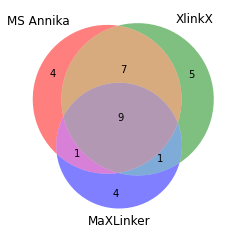

In [12]:
venn3(subsets = (len(annika_links_1to1.difference(xlinkx_links_1to1, maxlinker_links_1to1)),
                 len(xlinkx_links_1to1.difference(annika_links_1to1, maxlinker_links_1to1)),
                 len(annika_links_1to1.intersection(xlinkx_links_1to1).difference(maxlinker_links_1to1)),
                 len(maxlinker_links_1to1.difference(annika_links_1to1, xlinkx_links_1to1)),
                 len(annika_links_1to1.intersection(maxlinker_links_1to1).difference(xlinkx_links_1to1)),
                 len(xlinkx_links_1to1.intersection(maxlinker_links_1to1).difference(annika_links_1to1)),
                 len(annika_links_1to1.intersection(maxlinker_links_1to1).intersection(xlinkx_links_1to1))), 
      set_labels = ("MS Annika", "XlinkX", "MaXLinker"), alpha = 0.5);

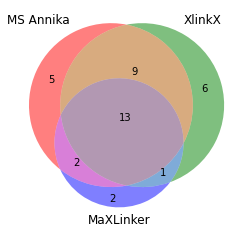

In [13]:
venn3(subsets = (len(annika_links_1to2.difference(xlinkx_links_1to2, maxlinker_links_1to2)),
                 len(xlinkx_links_1to2.difference(annika_links_1to2, maxlinker_links_1to2)),
                 len(annika_links_1to2.intersection(xlinkx_links_1to2).difference(maxlinker_links_1to2)),
                 len(maxlinker_links_1to2.difference(annika_links_1to2, xlinkx_links_1to2)),
                 len(annika_links_1to2.intersection(maxlinker_links_1to2).difference(xlinkx_links_1to2)),
                 len(xlinkx_links_1to2.intersection(maxlinker_links_1to2).difference(annika_links_1to2)),
                 len(annika_links_1to2.intersection(maxlinker_links_1to2).intersection(xlinkx_links_1to2))), 
      set_labels = ("MS Annika", "XlinkX", "MaXLinker"), alpha = 0.5);

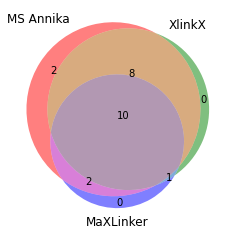

In [14]:
venn3(subsets = (len(annika_links_nsp8.difference(xlinkx_links_nsp8, maxlinker_links_nsp8)),
                 len(xlinkx_links_nsp8.difference(annika_links_nsp8, maxlinker_links_nsp8)),
                 len(annika_links_nsp8.intersection(xlinkx_links_nsp8).difference(maxlinker_links_nsp8)),
                 len(maxlinker_links_nsp8.difference(annika_links_nsp8, xlinkx_links_nsp8)),
                 len(annika_links_nsp8.intersection(maxlinker_links_nsp8).difference(xlinkx_links_nsp8)),
                 len(xlinkx_links_nsp8.intersection(maxlinker_links_nsp8).difference(annika_links_nsp8)),
                 len(annika_links_nsp8.intersection(maxlinker_links_nsp8).intersection(xlinkx_links_nsp8))), 
      set_labels = ("MS Annika", "XlinkX", "MaXLinker"), alpha = 0.5);